In [ ]:
# Import Libraries for association rule mininig to find frequent patterns
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules

# Import Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import re
import networkx as nx

# detail
# script : MuhamadAlfarisy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Parsing csv data

In [ ]:
# mount gdrive
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


In [ ]:
# parsing csv file
df = pd.read_csv("/content/drive/MyDrive/Kuliah S2/File kuliah/Pribadi/Semester 1/EL5000 - Matematika lanjut/tugas/week5/dataset_foodmart.csv")
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,invoice_id,product_id,product_name,unit_sales,invoice_date,unit_price,customer_id
0,9999-705,428,Steady Deodorant,2.0,705,1.34,9999
1,9999-705,844,Nationeel Chocolate Chip Cookies,3.0,705,9.93,9999
2,9999-705,1154,Dual City Scallops,2.0,705,3.40,9999
3,9999-705,638,Bravo Canned Beets,2.0,705,6.30,9999
4,9999-545,108,Golden Frozen Peas,3.0,545,6.57,9999
5,9999-545,724,Imagine Lime Popsicles,4.0,545,11.76,9999
6,9999-545,435,Steady 200 MG Ibuprofen,3.0,545,8.49,9999
7,9998-719,337,Better Turkey Noodle Soup,2.0,719,1.50,9998
8,9998-719,782,Cormorant Economy Toilet Brush,3.0,719,7.02,9998
9,9998-719,686,Cutting Edge Pimento Loaf,4.0,719,7.28,9998


In [ ]:
# size data
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(83696, 7)

In [ ]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


invoice_id       object
product_id        int64
product_name     object
unit_sales      float64
invoice_date      int64
unit_price      float64
customer_id       int64
dtype: object

In [ ]:
# statistical analysis of data
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,unit_sales,invoice_date,unit_price,customer_id
count,68604.000000,68604.000000,68604.000000,68604.000000,68604.000000
mean,788.070608,3.105300,551.348988,6.589484,5140.564734
std,448.835313,0.833651,107.336764,3.473285,2899.853845
min,1.000000,1.000000,367.000000,0.500000,3.000000
25%,407.000000,3.000000,457.000000,3.840000,2639.000000
50%,791.000000,3.000000,551.000000,6.080000,5088.000000
75%,1181.000000,4.000000,648.000000,8.720000,7619.000000
max,1559.000000,6.000000,730.000000,23.640000,10277.000000


# Data cleaning

In [ ]:
# data cleaning
df['product_name'] = df['product_name'].str.strip()
df.dropna(axis=0, subset=['invoice_id'], inplace=True) #drop rows that dont have invoice numbers.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# sanity check
df['product_name']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                        Steady Deodorant
1        Nationeel Chocolate Chip Cookies
2                      Dual City Scallops
3                      Bravo Canned Beets
4                      Golden Frozen Peas
                       ...               
83691          Red Wing 60 Watt Lightbulb
83692                     Club Whole Milk
83693               Fast BBQ Potato Chips
83694    Dollar Monthly Computer Magazine
83695                     Token Diet Cola
Name: product_name, Length: 83696, dtype: object

In [ ]:
# product sales
df['product_name'].nunique()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1559

In [ ]:
# calculate benchmark min support
min_sup_benchmark = 1559/83696
min_sup_benchmark

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.01862693557637163

# Top 10 most frequent product
#### note : product purchased in same day & same customer, included in min 2 pair product sold

In [ ]:
product_list = df['product_name'].value_counts().sort_values(ascending=False)[:10]
product_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Special Wheat Puffs               82
Hermanos Broccoli                 79
Fast Beef Jerky                   78
Big Time Ice Cream                77
Fabulous Apple Juice              77
Red Wing 60 Watt Lightbulb        77
Carlson Whole Milk                75
Big Time Frozen Mushroom Pizza    75
Landslide Pepper                  74
Steady Whitening Toothpast        74
Name: product_name, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

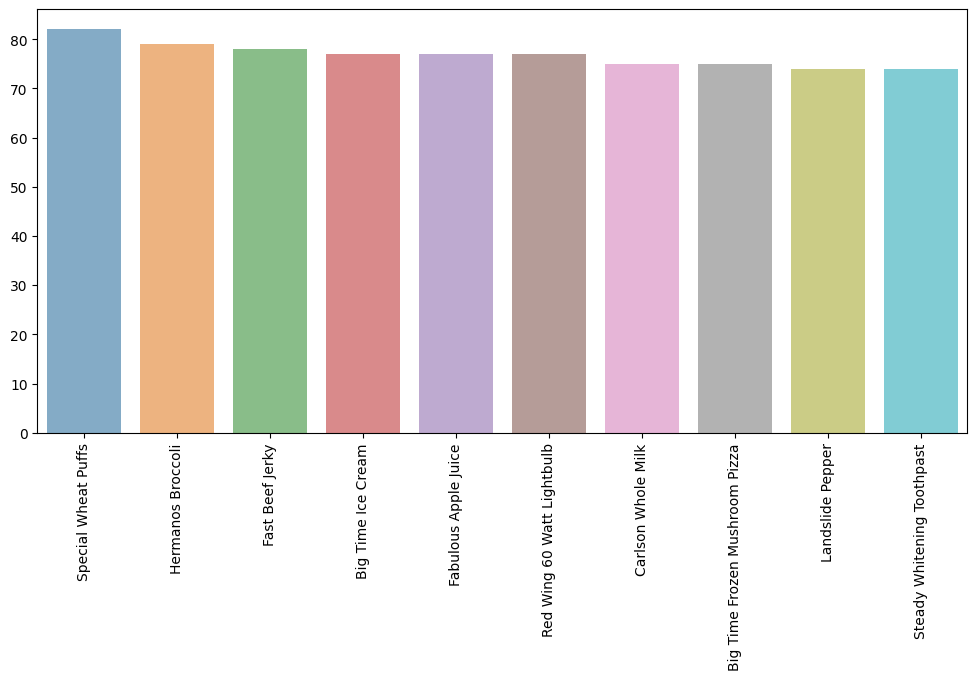

In [ ]:
plt.figure(figsize=(12,5.5))
plt.xticks(rotation = 90)

sns.barplot(x=product_list.index,y=product_list.values, alpha=0.6)

In [ ]:
# construct basket - as pivot tabel
basket = pd.pivot_table(data=df,index='invoice_id',columns='product_name',values='unit_sales', aggfunc='sum',fill_value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

basket.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
invoice_id,,,,,,,,,,,,,,,,,,,,,
10-386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10-424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10-704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10003-603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10004-458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10004-611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10007-661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10007-683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
10012-469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
basket.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(18516, 1559)

In [ ]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18516 entries, 10-386 to 9999-705
Columns: 1559 entries, ADJ Rosy Sunglasses to Washington Strawberry Drink
dtypes: int64(1559)
memory usage: 220.4+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# convert_into_binary - converts a values < 0 to 0 and value greater than equal 1 to 1.
def convert_into_binary(x):
    if x <= 0:
        return 0
    return 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#apply function to data using applymap.
basket_sets = basket.applymap(convert_into_binary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
freq_itemset=apriori(basket_sets, min_support=0.0001, low_memory=True,use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
freq_itemset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.003078,(ADJ Rosy Sunglasses)
1,0.002970,(Akron City Map)
2,0.003024,(Akron Eyeglass Screwdriver)
3,0.002916,(American Beef Bologna)
4,0.002862,(American Chicken Hot Dogs)
...,...,...
43461,0.000108,"(Landslide Strawberry Preserves, Horatio Raspb..."
43462,0.000108,"(Faux Products Multi-Symptom Cold Remedy, Club..."
43463,0.000108,"(Urban Egg Substitute, High Top Beets, Denny 6..."
43464,0.000108,"(Moms Low Fat Cole Slaw, Ebony Party Nuts, Lan..."


In [ ]:
freq_itemset['length'] = freq_itemset['itemsets'].apply(lambda x: len(x))
freq_itemset.sort_values('length', ascending= False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
43465,0.000108,"(Tri-State Mushrooms, High Top Walnuts, Sunset...",7
43457,0.000108,"(Pleasant Chicken Ramen Soup, Red Spade Chicke...",7
43449,0.000108,"(Club Jack Cheese, Horatio Golden Raisins, Ami...",7
43450,0.000108,"(Atomic White Chocolate Bar, Big Time Orange P...",7
43451,0.000162,"(Even Better Low Fat Sour Cream, Carrington Ic...",7
...,...,...,...
1043,0.002538,(Landslide Hot Chocolate),1
1044,0.003024,(Landslide Low Fat Apple Butter),1
1045,0.003078,(Landslide Oregano),1
1046,0.003997,(Landslide Pepper),1


In [ ]:
freq_itemset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.003078,(ADJ Rosy Sunglasses),1
1,0.002970,(Akron City Map),1
2,0.003024,(Akron Eyeglass Screwdriver),1
3,0.002916,(American Beef Bologna),1
4,0.002862,(American Chicken Hot Dogs),1
...,...,...,...
43461,0.000108,"(Landslide Strawberry Preserves, Horatio Raspb...",7
43462,0.000108,"(Faux Products Multi-Symptom Cold Remedy, Club...",7
43463,0.000108,"(Urban Egg Substitute, High Top Beets, Denny 6...",7
43464,0.000108,"(Moms Low Fat Cole Slaw, Ebony Party Nuts, Lan...",7


In [ ]:
freq_itemset.sort_values("support", ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
1322,0.004429,(Special Wheat Puffs),1
766,0.004267,(Hermanos Broccoli),1
578,0.004213,(Fast Beef Jerky),1
1266,0.004159,(Red Wing 60 Watt Lightbulb),1
142,0.004159,(Big Time Ice Cream),1
...,...,...,...
16928,0.000108,"(Nationeel Low Fat BBQ Chips, Excel Monthly Fa...",2
16929,0.000108,"(Excel Monthly Fashion Magazine, Pearl Chablis...",2
16930,0.000108,"(Excel Monthly Fashion Magazine, Plato Apple J...",2
16931,0.000108,"(Excel Monthly Fashion Magazine, Pleasant Chic...",2


In [ ]:
freq_itemset['length'] = freq_itemset['itemsets'].apply(lambda x: len(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
freq_itemset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.003078,(ADJ Rosy Sunglasses),1
1,0.002970,(Akron City Map),1
2,0.003024,(Akron Eyeglass Screwdriver),1
3,0.002916,(American Beef Bologna),1
4,0.002862,(American Chicken Hot Dogs),1


In [ ]:
# Collecting the inferred rules in a dataframe
rules = association_rules(freq_itemset, metric ="lift", min_threshold = 0.5)

# rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                       antecedents                      consequents  \
0  (BBB Best Creamy Peanut Butter)            (ADJ Rosy Sunglasses)   
1            (ADJ Rosy Sunglasses)  (BBB Best Creamy Peanut Butter)   
2                  (BBB Best Salt)            (ADJ Rosy Sunglasses)   
3            (ADJ Rosy Sunglasses)                  (BBB Best Salt)   
4        (BBB Best Strawberry Jam)            (ADJ Rosy Sunglasses)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.003294            0.003078  0.000108    0.032787  10.650561   
1            0.003078            0.003294  0.000108    0.035088  10.650561   
2            0.002916            0.003078  0.000108    0.037037  12.031189   
3            0.003078            0.002916  0.000108    0.035088  12.031189   
4            0.003132            0.003078  0.000162    0.051724  16.802178   

   leverage  conviction  zhangs_metric  
0  0.000098    1.030716       0.909103  
1  0.000098    1.03294

In [ ]:
rules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(214002, 10)

In [ ]:
#  apply filter for lift and confidence
rules[ (rules['lift'] >= 0.5) & (rules['confidence'] >= 0.5) ]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
54796,"(Fast Buttered Popcorn, BBB Best Strawberry Jam)",(ADJ Rosy Sunglasses),0.000108,0.003078,0.000108,1.000000,324.842105,0.000108,inf,0.997029
54797,"(Fast Buttered Popcorn, ADJ Rosy Sunglasses)",(BBB Best Strawberry Jam),0.000108,0.003132,0.000108,1.000000,319.241379,0.000108,inf,0.996975
54798,"(BBB Best Strawberry Jam, ADJ Rosy Sunglasses)",(Fast Buttered Popcorn),0.000162,0.002862,0.000108,0.666667,232.905660,0.000108,2.991413,0.995868
54803,"(Tri-State Onions, ADJ Rosy Sunglasses)",(BBB Best Strawberry Jam),0.000108,0.003132,0.000108,1.000000,319.241379,0.000108,inf,0.996975
54804,"(BBB Best Strawberry Jam, ADJ Rosy Sunglasses)",(Tri-State Onions),0.000162,0.001782,0.000108,0.666667,374.060606,0.000108,2.994653,0.997488
...,...,...,...,...,...,...,...,...,...,...
213989,"(Faux Products 200 MG Ibuprofen, Gorilla Straw...","(Tri-State Mushrooms, High Top Walnuts, Sunset...",0.000108,0.000108,0.000108,1.000000,9258.000000,0.000108,inf,1.000000
213990,"(Faux Products 200 MG Ibuprofen, Sunset Plasti...","(Tri-State Mushrooms, High Top Walnuts, Sunset...",0.000108,0.000108,0.000108,1.000000,9258.000000,0.000108,inf,1.000000
213991,"(High Top Sweet Peas, Faux Products 200 MG Ibu...","(Tri-State Mushrooms, High Top Walnuts, Sunset...",0.000216,0.000108,0.000108,0.500000,4629.000000,0.000108,1.999784,1.000000
213992,"(Gorilla Strawberry Yogurt, Sunset Plastic Forks)","(Tri-State Mushrooms, High Top Walnuts, Sunset...",0.000162,0.000108,0.000108,0.666667,6172.000000,0.000108,2.999676,1.000000


In [ ]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BBB Best Creamy Peanut Butter),(ADJ Rosy Sunglasses),0.003294,0.003078,0.000108,0.032787,10.650561,0.000098,1.030716,0.909103
1,(ADJ Rosy Sunglasses),(BBB Best Creamy Peanut Butter),0.003078,0.003294,0.000108,0.035088,10.650561,0.000098,1.032949,0.908906
2,(BBB Best Salt),(ADJ Rosy Sunglasses),0.002916,0.003078,0.000108,0.037037,12.031189,0.000099,1.035265,0.919565
3,(ADJ Rosy Sunglasses),(BBB Best Salt),0.003078,0.002916,0.000108,0.035088,12.031189,0.000099,1.033341,0.919714
4,(BBB Best Strawberry Jam),(ADJ Rosy Sunglasses),0.003132,0.003078,0.000162,0.051724,16.802178,0.000152,1.051299,0.943439
...,...,...,...,...,...,...,...,...,...,...
213997,(Sunset Scented Tissue),"(Tri-State Mushrooms, High Top Walnuts, Faux P...",0.002484,0.000108,0.000108,0.043478,402.521739,0.000108,1.045342,1.000000
213998,(Faux Products 200 MG Ibuprofen),"(Tri-State Mushrooms, High Top Walnuts, Sunset...",0.002484,0.000108,0.000108,0.043478,402.521739,0.000108,1.045342,1.000000
213999,(Gorilla Strawberry Yogurt),"(Tri-State Mushrooms, High Top Walnuts, Sunset...",0.002970,0.000108,0.000108,0.036364,336.654545,0.000108,1.037624,1.000000
214000,(Sunset Plastic Forks),"(Tri-State Mushrooms, High Top Walnuts, Sunset...",0.003078,0.000108,0.000108,0.035088,324.842105,0.000108,1.036252,1.000000
